Import Libraries

In [1]:
import tensorflow as tf  #had to download
import seaborn as sn      #had to download
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow, imsave
from glob import glob
from PIL import Image as pil_image
from IPython.display import Image as Image
np.random.seed(123)

Import Dataset (excel file)

In [2]:
main_df = pd.read_csv('HAM10000_metadata.csv')  #using read_csv method because excel is in 'csv' format
main_df.head()               # head displays first 5 rows

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


Data Analysis -every data tells a story :-D 

<AxesSubplot:xlabel='dx', ylabel='count'>

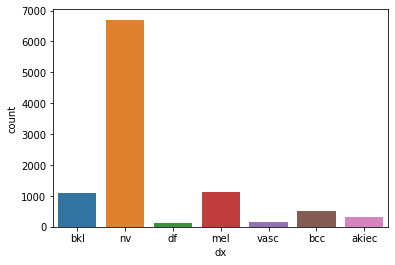

In [29]:
sn.countplot(x=main_df['dx'])    #'Countplot of the types'

In [4]:
main_df['dx'].value_counts()   # count of the each type in 'dx' coloumn

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'scalp'),
  Text(1, 0, 'ear'),
  Text(2, 0, 'face'),
  Text(3, 0, 'back'),
  Text(4, 0, 'trunk'),
  Text(5, 0, 'chest'),
  Text(6, 0, 'upper extremity'),
  Text(7, 0, 'abdomen'),
  Text(8, 0, 'unknown'),
  Text(9, 0, 'lower extremity'),
  Text(10, 0, 'genital'),
  Text(11, 0, 'neck'),
  Text(12, 0, 'hand'),
  Text(13, 0, 'foot'),
  Text(14, 0, 'acral')])

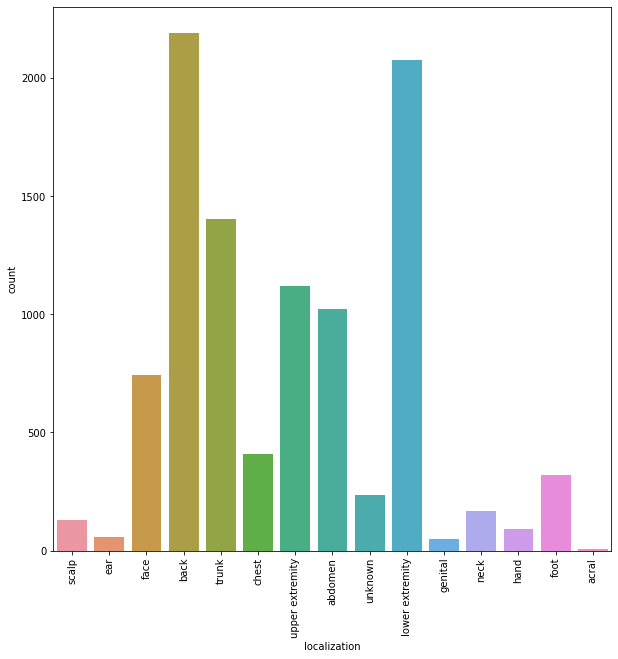

In [5]:
plt.figure(figsize=(10,10))
sn.countplot(x=main_df['localization'])    #countplot of localization
plt.xticks(rotation=90)        

<AxesSubplot:xlabel='dx_type', ylabel='count'>

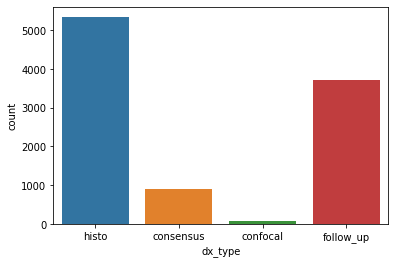

In [6]:
sn.countplot(x=main_df['dx_type'])    #countplot of dx_type

In [7]:
main_df['dx_type'].value_counts()    #count of dx_type

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

In [8]:
main_df.isna().sum().sort_values(ascending=False)   #trying to find any null value 

age             57
localization     0
sex              0
dx_type          0
dx               0
image_id         0
lesion_id        0
dtype: int64

In [9]:
print(main_df['age'].mean())
print(main_df['age'].median())
main_df['age'].fillna(main_df['age'].mean(),inplace=True)   #fill the null value with mean

51.863828077927295
50.0


<AxesSubplot:xlabel='age', ylabel='Density'>

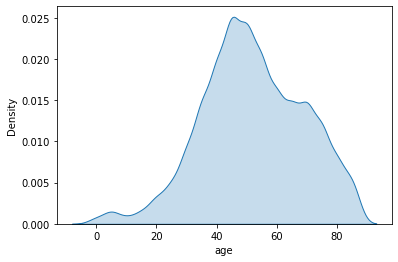

In [10]:
sn.kdeplot(main_df['age'],shade=True)      #kdeplot of the age of patients

In [11]:
main_df['sex'].value_counts()     #count of total number of people by gender

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [12]:

#creating a dictionary so as to allow easy mapping 
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_classes_dict = {
    0:'nv',
    1:'mel',
    2:'bkl',
    3:'bcc',
    4:'akiec',
    5:'vasc',
    6:'df'
}
main_df['cell_type'] = main_df['dx'].map(lesion_type_dict)

In [13]:
main_df['cell_type_idx'] = pd.Categorical(main_df['cell_type']).codes  #creating a new category in df----

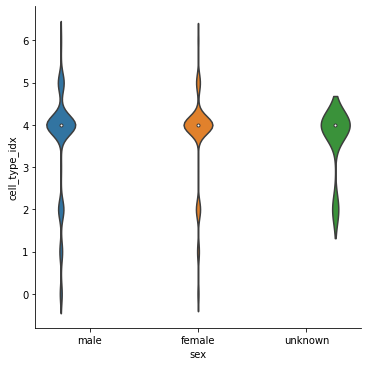

In [14]:
sn.catplot(x="sex", y="cell_type_idx",   #catplot of the gender
                    hue="sex",
                    data=main_df,
                    kind="violin")

In [15]:
import os
#pil_image = os.path.join('images')     #adding path to the image------------
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join('', '*', '*.jpg'))}

In [16]:
main_df['path'] = main_df['image_id'].map(image_path.get)    #creating a new coloumn which is mapped by the image id-----
main_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,HAM10000_images_part_2\ISIC_0031633.jpg


In [17]:
image_example = np.asarray(pil_image.open(main_df['path'][0]))   #open first row of coloumn-path as array

In [18]:
image_example.shape  #shape of array

(450, 600, 3)

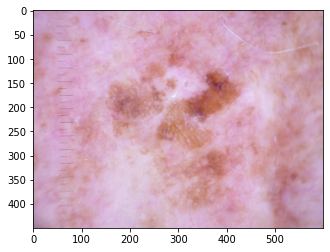

In [19]:
plt.imshow(image_example)   #display image

In [20]:
main_df['image'] = main_df['path'].map(lambda x: np.asarray(pil_image.open(x).resize((120,90))))  #------

In [21]:
main_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0027419.jpg,"[[[190, 152, 194], [192, 155, 197], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0025030.jpg,"[[[24, 13, 22], [24, 14, 23], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0026769.jpg,"[[[185, 126, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0025661.jpg,"[[[24, 11, 17], [25, 11, 20], [31, 16, 27], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,HAM10000_images_part_2\ISIC_0031633.jpg,"[[[131, 89, 111], [143, 98, 121], [153, 108, 1..."


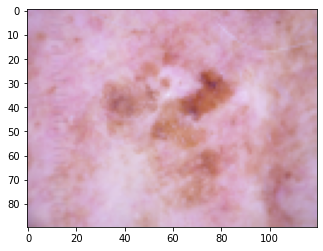

In [22]:
plt.imshow(main_df['image'][0])

In [23]:
main_df['image'][0].shape  #size after resizing

(90, 120, 3)

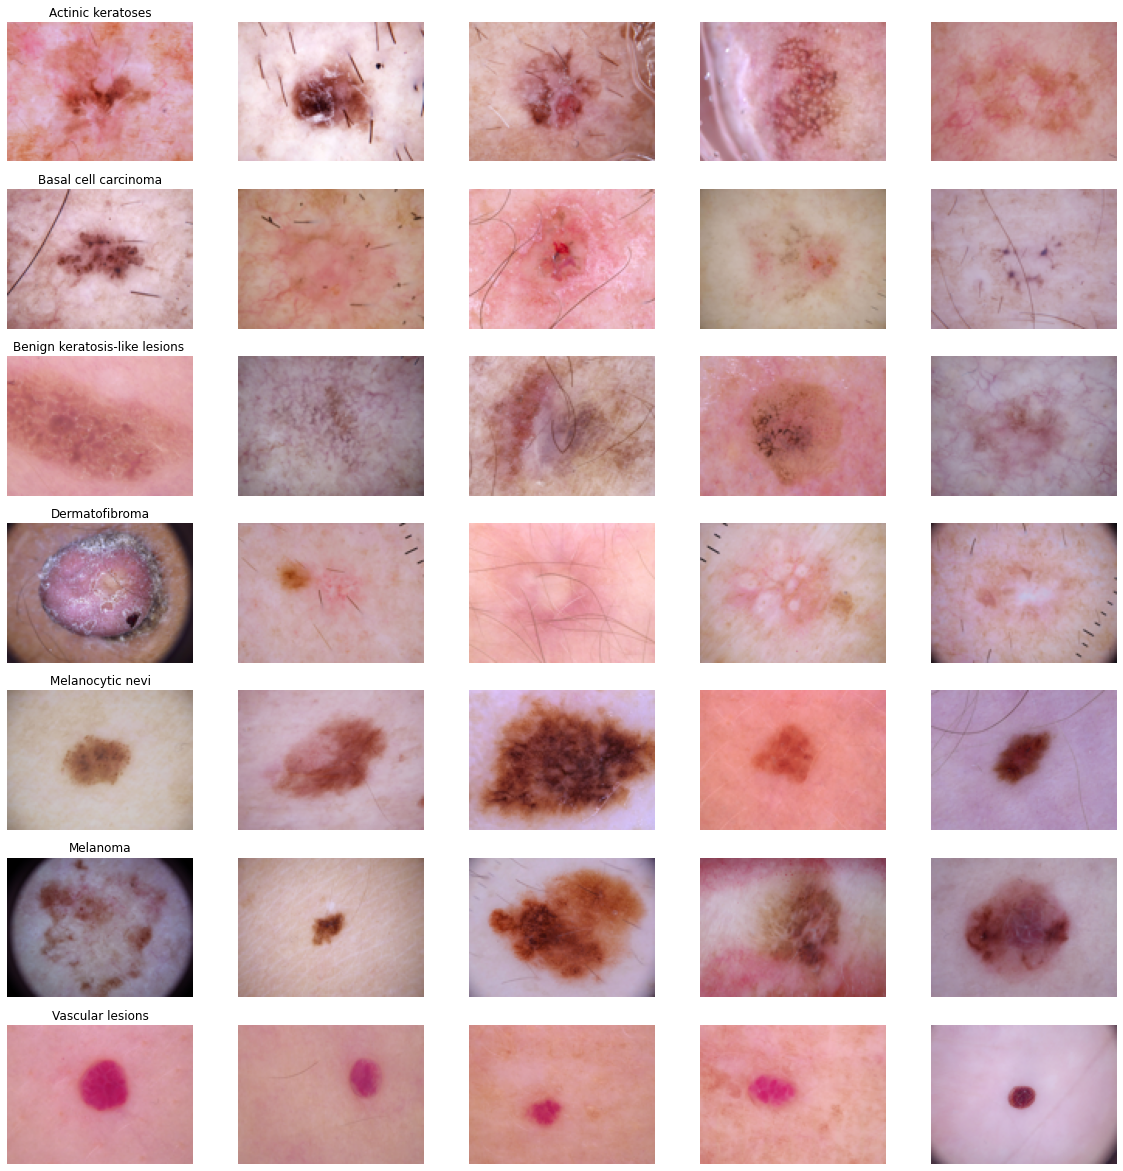

In [24]:
#way of displaying------
fig,axes = plt.subplots(7,5,figsize=(20,21))
for nth_axis,(cell_type_name,cell_type_row) in zip(axes,main_df.sort_values(['cell_type']).groupby('cell_type')):
    nth_axis[0].set_title(cell_type_name)
    for column_axis,(_,column_row) in zip(nth_axis,cell_type_row.sample(5).iterrows()):
        column_axis.imshow(column_row['image'])  
        column_axis.axis('off')

In [26]:
from sklearn.model_selection import train_test_split
features = main_df.drop(['cell_type_idx'],axis=1)  #drop coloumn

target = main_df['cell_type_idx']

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(features,target,test_size=0.01)

In [27]:
x_train = np.asarray(X_TRAIN['image'].tolist())
x_test = np.asarray(X_TEST['image'].tolist())

In [28]:
print(x_train.shape)
print(x_test.shape)

(9914, 90, 120, 3)
(101, 90, 120, 3)


In [30]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train-x_train_mean) / x_train_std
x_test = (x_test-x_test_mean) / x_test_std

In [33]:

print(Y_TRAIN.shape)
print(Y_TEST.shape)

(9914,)
(101,)


In [34]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(Y_TRAIN,num_classes=7)
y_test = to_categorical(Y_TEST,num_classes=7)

In [35]:
print(y_train.shape)
print(y_test.shape)

(9914, 7)
(101, 7)


In [36]:
X_train,X_val, Y_train,Y_val = train_test_split(x_train,y_train,test_size=0.15)

In [37]:
print(X_train.shape)
print(x_test.shape)
print(X_val.shape)

(8426, 90, 120, 3)
(101, 90, 120, 3)
(1488, 90, 120, 3)


In [39]:
import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K


input_shape = (90, 120, 3)
num_classes = 7

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3),activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding ='Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding ='Same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 120, 32)       896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 120, 32)       9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 60, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 30, 64)        0

In [40]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [42]:

datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1 # Randomly zoom image 
)


epochs = 30
batch_size = 16
model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val))
                              

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 527 steps, validate on 1488 samples
Epoch 1/30
527/527 [==============================] - 419s 795ms/step - loss: 0.9893 - accuracy: 0.6666 - val_loss: 0.9326 - val_accuracy: 0.6969
Epoch 2/30
527/527 [==============================] - 252s 479ms/step - loss: 0.8854 - accuracy: 0.6828 - val_loss: 0.7592 - val_accuracy: 0.7157
Epoch 3/30
527/527 [==============================] - 257s 488ms/step - loss: 0.8448 - accuracy: 0.6904 - val_loss: 0.7318 - val_accuracy: 0.7191
Epoch 4/30
527/527 [==============================] - 256s 485ms/step - loss: 0.8003 - accuracy: 0.7070 - val_loss: 0.7633 - val_accuracy: 0.7090
Epoch 5/30
527/527 [==============================] - 259s 492ms/step - loss: 0.7748 - accuracy: 0.7134 - val_loss: 0.6956 - val_accuracy: 0.7278
Epoch 6/30
527/527 [==============================] - 258s 490ms/step - loss: 0.7426 - accuracy: 0.7291 - val_loss: 0.7047 

AttributeError: module 'tensorflow_core.keras' has no attribute 'save_model'

In [1]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/melanoma1.jpg', target_size = (120,90))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/single_prediction/melanoma1.jpg'